In [4]:
import sys
sys.path.insert(0,'..')
from glob import glob
from mmdetection.mmdet.apis import init_detector, inference_detector, show_result_pyplot

# CONSTANTS
config_file = '../mmdetection/configs/faster_rcnn_r50_fpn_1x.py'
checkpoint_file = '../../models/work_dirs/faster_rcnn_r50_fpn_grid-yaya-t3-subset-visdrone/epoch_7.pth'

img_list = glob('../../data/ktr-test/test-grid/B23072019_V1_K1/frame23-*')


# or img = mmcv.imread(img), which will only load it once
out_file_name = 'result.png'
class_names = ['insan', 'arac'] 
auto_class = True # turn this on if you want to get class names directly from model and config

device = 'cuda:0'

# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device=device)

In [2]:
if auto_class:
    class_names = model.CLASSES
# test a single image and show the results

for img in tqdm_notebook(img_list):
    results['/'.join(img.split('/')[-2:])[:-4]] = inference_detector(model, img)

result

[array([[2.9335178e+02, 1.5933774e+02, 3.0573975e+02, 1.8948878e+02,
         3.8026223e-01],
        [2.8768304e+02, 1.5336043e+02, 3.0617697e+02, 1.9691995e+02,
         8.9075524e-01],
        [2.8869669e+02, 1.5750868e+02, 3.0072409e+02, 1.8591518e+02,
         9.5859371e-02]], dtype=float32)]

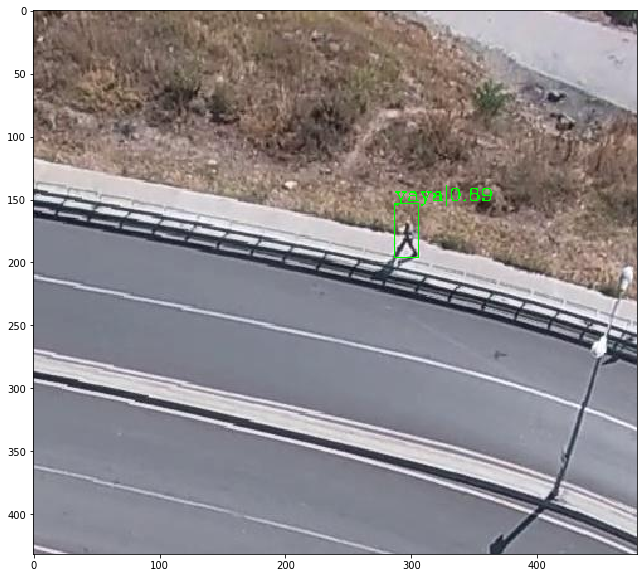

In [3]:
# remove `out_file` if you want it to show images on local
# show_result(img, result, model.CLASSES, score_thr=0.3, out_file=out_file_name)
show_result_pyplot(img, result, class_names, score_thr=0.7)
#show_result(img, result, class_names, score_thr=0.005)

In [56]:
# from PIL import Image

# Image.open('../../data/ktr-test/test/B23072019_V1_K1/frame2200.jpg')